# It's Raining Bells, Hallelujah!

## A guide to living large in Animal Crossing: New Horizons

### by Kwame V. Taylor

It's Raining Bells, Hallelujah is data-driven guide to getting rich and staying rich with maximized efficiency on the Nintendo Switch video game, Animal Crossing: New Horizons.

Bells are the currency used in the video game, Animal Crossing: New Horizons. Users can buy and sell items using bells, as well as exchange bells and items with both in-game characters (also known as Non-Playable Characters, or NPCs) and other users.

<img src="https://mcsun.org/wp-content/uploads/2020/05/Banner-Animal-Crossing-New-Horizons.jpg">

## Insects Analysis

### Set up environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# default viz size settings
plt.rc('figure', figsize=(9, 7))
plt.rc('font', size=13)

from dateutil import parser
import datetime
import re

### Acquire data

Let's look at insects. I already know that people love to bank big on catching tarantulas and scorpions.

In [2]:
insects = pd.read_csv('insects.csv')

In [3]:
insects.sort_values(by="Sell", ascending=False).head(6)

,#,Name,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,...,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID
29,61,giraffe stag,12000,On palm trees,Any weather,100,1,NaN,NaN,NaN,...,NaN,NaN,NaN,Black,Black,Ins77,InsectGirafanokogirikuwagata,FtrInsectGirafanokogirikuwagata,3482,PSChjzMhGwhnsHTs4
30,60,golden stag,12000,On palm trees,Any weather,100,1,NaN,NaN,NaN,...,NaN,NaN,NaN,Black,Yellow,Ins50,InsectOugononikuwagata,FtrInsectOugononikuwagata,638,2C8cSphidFCBPxYEe
39,65,horned hercules,12000,On palm trees,Any weather,100,1,NaN,NaN,NaN,...,NaN,NaN,NaN,Yellow,Black,Ins54,InsectHerakuresuohkabuto,FtrInsectHerakuresuohkabuto,600,TqhEomNEMDZ2wcTpk
65,52,scarab beetle,10000,On trees (any kind),Any weather,50,3,NaN,NaN,NaN,...,NaN,NaN,NaN,Black,Beige,Ins43,InsectPurachinakogane,FtrInsectPurachinakogane,639,2HXdFD8s6BmYYMf4u
27,57,giant stag,10000,On trees (any kind),Any weather,50,5,NaN,NaN,NaN,...,NaN,NaN,NaN,Black,Black,Ins47,InsectOhkuwagata,FtrInsectOhkuwagata,637,KhrTLzayFz23zz2kn
31,54,goliath beetle,8000,On palm trees,Any weather,100,2,NaN,NaN,NaN,...,NaN,NaN,5 PM – 8 AM,Red,Black,Ins55,InsectGoraiasuohtsunohanamuguri,FtrInsectGoraiasuohtsunohanamuguri,596,wZQMZfhtRyPFAapmF


### Prepare data

First I'll set the index to #.

In [4]:
insects = insects.set_index('#')

Then I'll drop some of the columns I won't be using.

In [5]:
insects = insects.drop(columns=['Icon Filename', 'Critterpedia Filename', 'Furniture Filename',
       'Internal ID', 'Unique Entry ID'])

And impute NaNs with 0s for now.

In [6]:
insects = insects.fillna(0)

In [7]:
insects.isna().sum()

Name                       0
Sell                       0
Where/How                  0
Weather                    0
Total Catches to Unlock    0
Spawn Rates                0
NH Jan                     0
NH Feb                     0
NH Mar                     0
NH Apr                     0
NH May                     0
NH Jun                     0
NH Jul                     0
NH Aug                     0
NH Sep                     0
NH Oct                     0
NH Nov                     0
NH Dec                     0
SH Jan                     0
SH Feb                     0
SH Mar                     0
SH Apr                     0
SH May                     0
SH Jun                     0
SH Jul                     0
SH Aug                     0
SH Sep                     0
SH Oct                     0
SH Nov                     0
SH Dec                     0
Color 1                    0
Color 2                    0
dtype: int64

Now I'll check data types.

In [8]:
insects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 10 to 2
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     80 non-null     object
 1   Sell                     80 non-null     int64 
 2   Where/How                80 non-null     object
 3   Weather                  80 non-null     object
 4   Total Catches to Unlock  80 non-null     int64 
 5   Spawn Rates              80 non-null     object
 6   NH Jan                   80 non-null     object
 7   NH Feb                   80 non-null     object
 8   NH Mar                   80 non-null     object
 9   NH Apr                   80 non-null     object
 10  NH May                   80 non-null     object
 11  NH Jun                   80 non-null     object
 12  NH Jul                   80 non-null     object
 13  NH Aug                   80 non-null     object
 14  NH Sep                   80 non-null     obj

Spawn Rates needs to be an integer.

In [9]:
insects['Spawn Rates'].value_counts()

5       11
2        8
30       7
10       7
50       6
20       6
60       6
40       6
70       4
1        4
0        3
25       2
35       2
7        2
15       2
5–10     1
80       1
3        1
200      1
Name: Spawn Rates, dtype: int64

Because one of the values is a range, I'm going to make it the average of the start and end values rounded to the nearest integer, which is 8.

In [10]:
insects['Spawn Rates'] = insects['Spawn Rates'].where(insects['Spawn Rates'] != '5–10', 8).astype(int)

In [11]:
insects['Spawn Rates'].value_counts()

5      11
2       8
10      7
30      7
20      6
60      6
50      6
40      6
70      4
1       4
0       3
15      2
7       2
25      2
35      2
8       1
200     1
3       1
80      1
Name: Spawn Rates, dtype: int64

In [12]:
insects.head(3)

,Name,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,NH Apr,...,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2
#,,,,,,,,,,,,,,,,,,,,,
10,agrias butterfly,3000,Flying near flowers,Any except rain,20,5,0,0,0,8 AM – 5 PM,...,0,0,0,0,0,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,Pink,Green
69,ant,80,On rotten turnips,Any weather,0,0,All day,All day,All day,All day,...,All day,All day,All day,All day,All day,All day,All day,All day,Black,White
14,Atlas moth,3000,On trees (any kind),Any weather,20,5,0,0,0,7 PM – 4 AM,...,0,0,0,0,0,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,Orange,Yellow


### Convert appearance durations to timestamps

Now I want to turn the ```NH Jan``` (NH meaning Northern Hemisphere) to ```SH Dec``` (SH meaning Southern Hemisphere) into durational timestamps so I can perform time-series analysis.

I'll use this guide as a reference: https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [13]:
def convert_duration(df, col):
    df[col + ' Converted'] = pd.date_range('2015-07-03', '2015-07-10')

In [39]:
# convert strings 'NH Apr' plus '8 AM – 5 PM' to a timestamp... (unless it's a zero perhaps?)

start_time = parser.parse("April 1, 8 AM")
end_time = parser.parse("April 1, 5 PM")

In [41]:
pd.date_range(start_time, end_time, freq='H')

DatetimeIndex(['2021-04-01 08:00:00', '2021-04-01 09:00:00',
               '2021-04-01 10:00:00', '2021-04-01 11:00:00',
               '2021-04-01 12:00:00', '2021-04-01 13:00:00',
               '2021-04-01 14:00:00', '2021-04-01 15:00:00',
               '2021-04-01 16:00:00', '2021-04-01 17:00:00'],
              dtype='datetime64[ns]', freq='H')

Parse into start_time and end_time new columns. Use regex. Don't forget to get the months from the column names.

In [60]:
def get_start_and_end_times(df, col):
#    strings = df[col]
#    for string in strings:
    for row in df[col]:
        df[col + ' Converted'] = re.split(' – ', row)

I need to account for the 'All day's and the 0s I replaced the NaNs with.

In [67]:
def get_start_and_end_times(df, col):
#    strings = df[col]
#    for string in strings:
    for row in df[col]:
        if row == 'All day':
            df[col + ' Start and End Time'][row] = ['12 AM', '12 AM']
        elif row == 0:
            df[col + ' Start and End Time'][row] = ['8 AM', '8 AM']
        else:
            df[col + ' Start and End Time'][row] = re.split(' – ', row)

In [76]:
test_df['NH Jan'][1]

'All day'

In [68]:
get_start_and_end_times(test_df, 'NH Jan')

KeyError: 'NH Jan Start and End Time'

In [62]:
def get_start_and_end_times(df, col):
#    strings = df[col]
#    for string in strings:
    for row in df[col]:
        print(row)
        
get_start_and_end_times(insects, 'NH Jan')

0
All day
0
All day
0
0
0
0
4 PM – 11 PM
0
All day
0
4 AM – 7 PM
0
0
All day
0
0
0
All day
0
5 PM – 8 AM
0
0
0
All day
0
0
0
0
0
0
0
0
7 PM – 8 AM
0
0
0
0
0
0
0
0
0
0
0
0
0
All day
0
0
7 PM – 4 AM
0
8 AM – 7 PM
0
11 PM – 4 PM
0
0
0
8 AM – 5 PM
0
0
0
0
0
0
0
All day
7 PM – 8 AM
0
7 PM – 4 AM
0
0
0
0
0
0
All day
All day
0


I need to account for the 'All day's and the 0s I replaced the NaNs with.

In [71]:
test_df = insects.reset_index()
#test_df = get_start_and_end_times(test_df, 'NH Jan')
test_df

,#,Name,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,...,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2,SpawnRateSell
0,10,agrias butterfly,3000,Flying near flowers,Any except rain,20,5,0,0,0,...,0,0,0,0,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,Pink,Green,150.0
1,69,ant,80,On rotten turnips,Any weather,0,0,All day,All day,All day,...,All day,All day,All day,All day,All day,All day,All day,Black,White,0.0
2,14,Atlas moth,3000,On trees (any kind),Any weather,20,5,0,0,0,...,0,0,0,0,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,Orange,Yellow,150.0
3,68,bagworm,600,Shaking trees (hardwood or cedar only),Any weather,0,50,All day,All day,All day,...,All day,All day,All day,All day,All day,All day,All day,Brown,Blue,300.0
4,34,banded dragonfly,4500,Flying near water,Any except rain,50,7,0,0,0,...,0,0,0,0,0,8 AM – 5 PM,8 AM – 5 PM,Black,Yellow,315.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,67,walking leaf,600,Disguised under trees,Any weather,20,10,0,0,0,...,0,0,0,0,0,0,0,Green,Green,60.0
76,66,walking stick,600,On trees (any kind),Any weather,20,10,0,0,0,...,0,0,0,0,0,0,0,Brown,Yellow,60.0
77,25,wasp,2500,Shaking trees,Any weather,0,0,All day,All day,All day,...,All day,All day,All day,All day,All day,All day,All day,Yellow,Orange,0.0
78,71,wharf roach,200,On beach rocks,Any weather,0,20,All day,All day,All day,...,All day,All day,All day,All day,All day,All day,All day,Beige,Blue,40.0


In [ ]:
def convert_duration(df, col):
#    start_time = parser.parse("April 1, 8 AM")
#    end_time = parser.parse("April 1, 5 PM")

    start_date = datetime.date(year=2020, month=1, day=1)
    end_date   = datetime.date(year=2021, month=1,  day=1)

    current_date = start_date
    # Iterating over all dates from start date until end date including end date ("inclusive")
    while current_date <= end_date:
        # comment on function
        df[col + ' Converted'] = pd.date_range(start_time, end_time, freq='H')

        # Advancing current date by one day
        current_date += datetime.timedelta(days=1)

In [49]:
re.match('^\d+( )..', '8 AM – 5 PM')

<re.Match object; span=(0, 4), match='8 AM'>

In [52]:
re.match('\d+( )..$', '8 AM – 5 PM')

In [55]:
re.split(' – ', '8 AM – 5 PM')

['8 AM', '5 PM']

In [77]:
# Looks cleaned up enough to head into data exploration.

### Feature Engineering

Spawn Rates explaination: https://www.reddit.com/r/AnimalCrossing/comments/gdl9p3/heres_a_chart_of_the_spawn_rates_of_every_fish/

Added feature explaination to come here...

In [14]:
insects["SpawnRateSell"] = (insects['Spawn Rates'] / 100) * insects.Sell

### Exploratory Data Analysis

In [15]:
insects.describe()

,Sell,Total Catches to Unlock,Spawn Rates,SpawnRateSell
count,80.000000,80.00000,80.000000,80.00000
mean,2220.500000,17.50000,26.375000,155.64625
std,3209.388877,30.08427,29.890253,120.97685
min,10.000000,0.00000,0.000000,0.00000
25%,237.500000,0.00000,5.000000,79.50000
50%,600.000000,0.00000,20.000000,125.00000
75%,2625.000000,20.00000,40.000000,200.00000
max,12000.000000,100.00000,200.000000,600.00000


In [16]:
moth_avg = insects[insects['Name'].str.contains('moth')].Sell.mean()
butterfly_avg = insects[insects['Name'].str.contains('butterfly')].Sell.mean()
beetle_avg = insects[insects['Name'].str.contains('beetle')].Sell.mean()
dragonfly_avg = insects[insects['Name'].str.contains('dragonfly')].Sell.mean()
stag_avg = insects[insects['Name'].str.contains('stag')].Sell.mean()
cicada_avg = insects[insects['Name'].str.contains('cicada')].Sell.mean()
horned_avg = insects[insects['Name'].str.contains('horned')].Sell.mean()
cricket_avg = insects[insects['Name'].str.contains('cricket')].Sell.mean()

Text(0, 0.5, 'Bells')

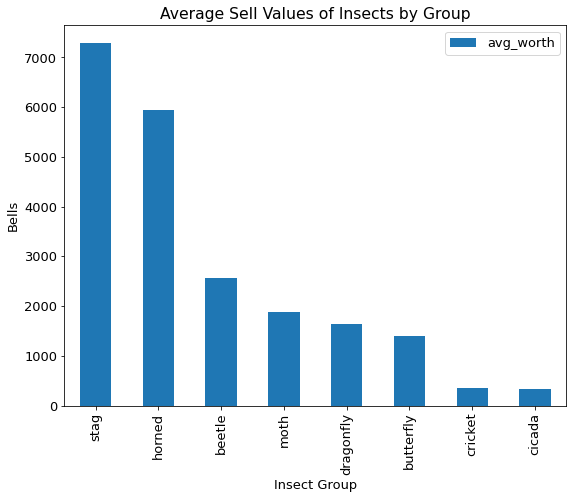

In [17]:
avg_worth_by_group_insects = pd.DataFrame([moth_avg, butterfly_avg, beetle_avg, dragonfly_avg, stag_avg, cicada_avg, horned_avg, cricket_avg], 
                                          ['moth', 'butterfly', 'beetle', 'dragonfly', 'stag', 'cicada', 'horned', 'cricket'])
avg_worth_by_group_insects = avg_worth_by_group_insects.rename(columns={0: "avg_worth"})

avg_worth_by_group_insects.sort_values(by="avg_worth", ascending=False).plot.bar()
plt.title("Average Sell Values of Insects by Group")
plt.xlabel("Insect Group")
plt.ylabel("Bells")

In [18]:
insects.columns

Index(['Name', 'Sell', 'Where/How', 'Weather', 'Total Catches to Unlock',
       'Spawn Rates', 'NH Jan', 'NH Feb', 'NH Mar', 'NH Apr', 'NH May',
       'NH Jun', 'NH Jul', 'NH Aug', 'NH Sep', 'NH Oct', 'NH Nov', 'NH Dec',
       'SH Jan', 'SH Feb', 'SH Mar', 'SH Apr', 'SH May', 'SH Jun', 'SH Jul',
       'SH Aug', 'SH Sep', 'SH Oct', 'SH Nov', 'SH Dec', 'Color 1', 'Color 2',
       'SpawnRateSell'],
      dtype='object')

Text(0, 0.5, 'Adjusted Value in Bells')

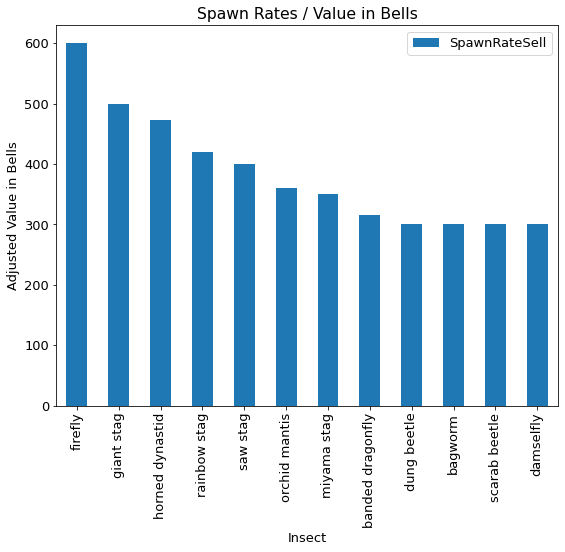

In [19]:
insects[["SpawnRateSell", 'Name']].set_index('Name').sort_values(by="SpawnRateSell", ascending=False).head(12).plot.bar()

plt.title("Spawn Rates / Value in Bells")
plt.xlabel("Insect")
plt.ylabel("Adjusted Value in Bells")

In [22]:
#insects.sort_values(by="Spawn Rates", ascending=False).tail(16)

In [23]:
#insects.sort_values(by="SpawnRateSell", ascending=False).head(12)

### Recommendations:

Giant Stag and Firefly give the best value in bells for how frequently they appear.

With the data that I've analyzed so far, I'd recommend hunting for bugs on the beach near palm trees.